## Autoregressive Model (AR)

A linear model, where current period values are a sum of past outcomes multiplied by a numeric factor.

## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing

In [2]:
raw_csv_data = pd.read_csv('data/Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index('date', inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method = 'ffill')

In [3]:
df_comp['market_value'] = df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The ACF

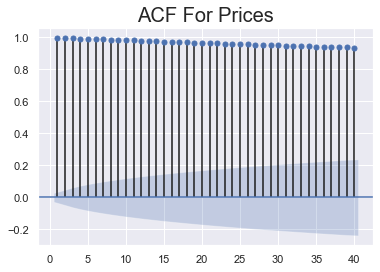

In [5]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title('ACF For Prices', size = 20)
plt.show()

## The PACF

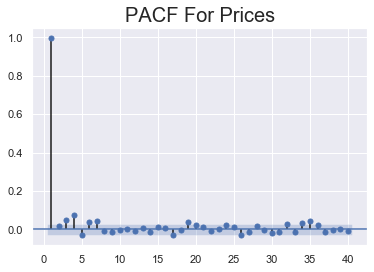

In [6]:
sgt.plot_pacf(df.market_value, zero = False, lags = 40, alpha = 0.05, method = ('ols'))
plt.title('PACF For Prices', size = 20)
plt.show()